In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import cv2

In [7]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [8]:
# pip install tensorflow matplotlib opencv-python


In [9]:
# Function to display a batch of images
def display_images(images, labels, class_names, n=10):
    plt.figure(figsize=(12, 6))
    for i in range(n):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

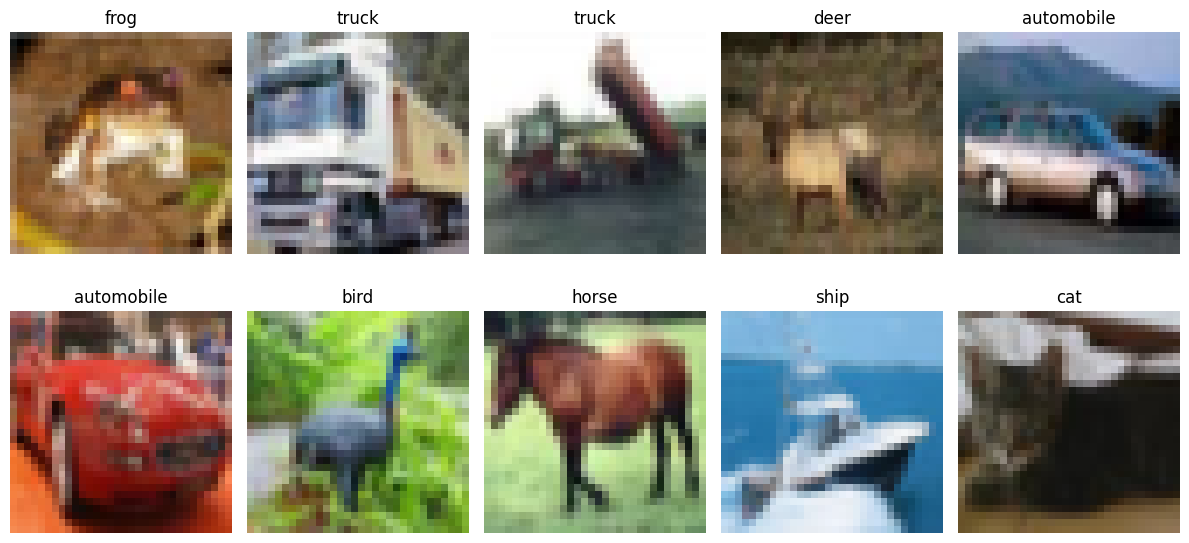

In [10]:
# Define the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display some images from the training set
display_images(x_train, y_train, class_names)

In [11]:
# Function to preprocess images
def preprocess_images(images):
    processed_images = []
    for img in images:
        # Resize images to 64x64
        img_resized = cv2.resize(img, (64, 64))
        
        # Rotate image by 15 degrees
        (h, w) = img_resized.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, 15, 1.0)
        img_rotated = cv2.warpAffine(img_resized, M, (w, h))
        
        processed_images.append(img_rotated)
    
    return np.array(processed_images)

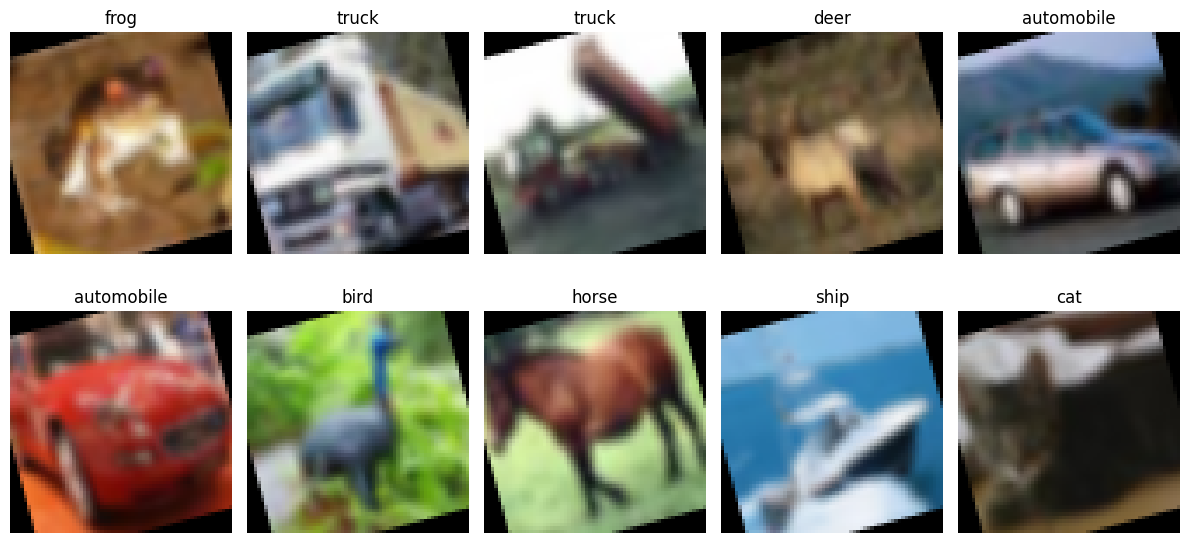

In [12]:
# Preprocess the training images
x_train_processed = preprocess_images(x_train)

# Display some processed images
display_images(x_train_processed, y_train, class_names)

In [13]:
# Function to apply Gaussian Blur to images
def apply_gaussian_blur(images, kernel_size=(5, 5)):
    blurred_images = []
    for img in images:
        img_blurred = cv2.GaussianBlur(img, kernel_size, 0)
        blurred_images.append(img_blurred)
    
    return np.array(blurred_images)

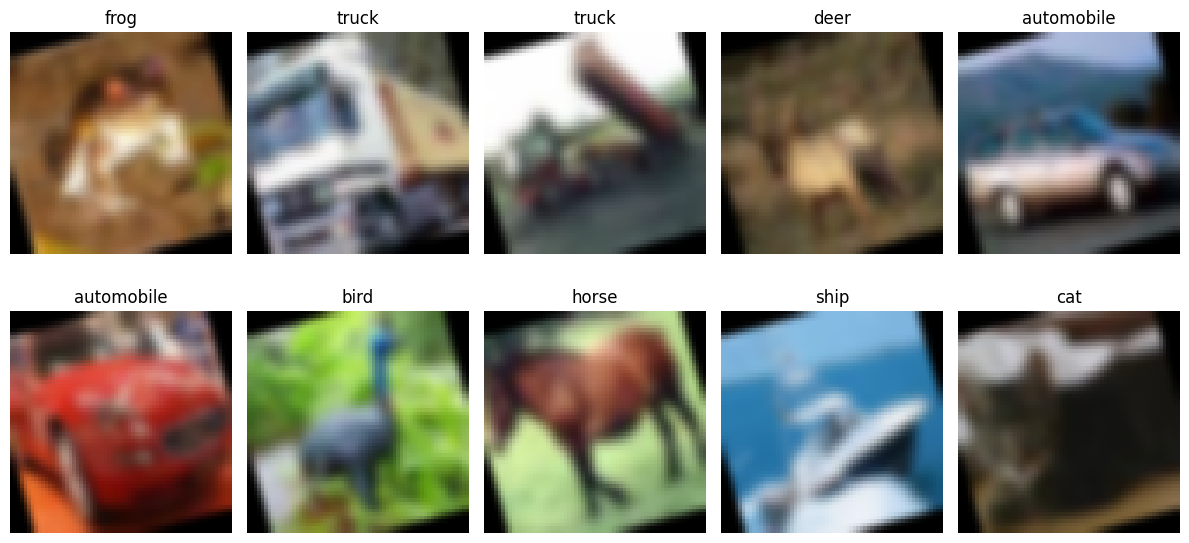

In [14]:
# Apply Gaussian Blur to the processed images
x_train_blurred = apply_gaussian_blur(x_train_processed)

# Display some blurred images
display_images(x_train_blurred, y_train, class_names)

In [15]:
# Function to add noise to images
def add_noise(images, noise_factor=0.1):
    noisy_images = []
    for img in images:
        noise = np.random.normal(loc=0.0, scale=noise_factor, size=img.shape)
        img_noisy = np.clip(img + noise, 0., 1.)  # Ensure pixel values stay within [0, 1]
        noisy_images.append(img_noisy)
    
    return np.array(noisy_images)

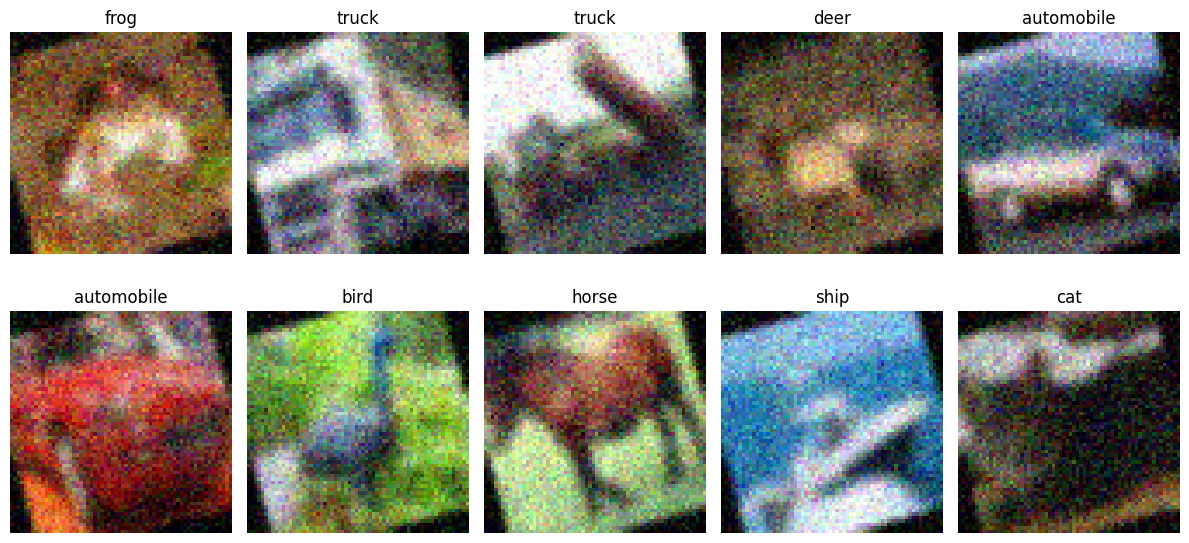

In [16]:
# Add noise to the blurred images
x_train_noisy = add_noise(x_train_blurred)

# Display some noisy images
display_images(x_train_noisy, y_train, class_names)

In [17]:
# Function to augment images using Keras ImageDataGenerator
def augment_images(images):
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    datagen.fit(images)
    return datagen 

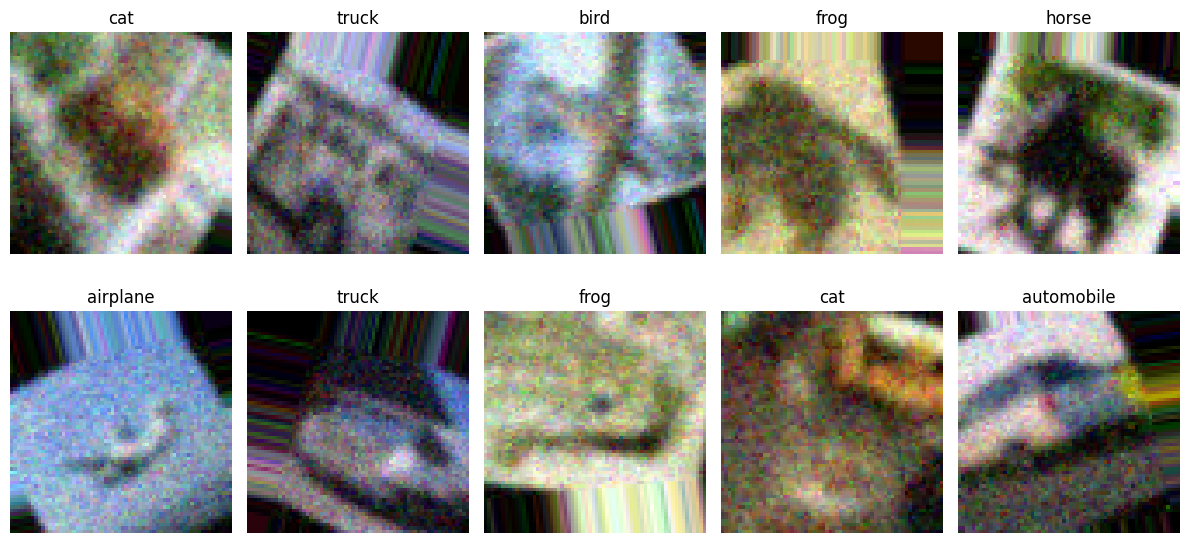

In [21]:
# Augment the images
datagen = augment_images(x_train_noisy)

# Display augmented images
for X_batch, y_batch in datagen.flow(x_train_noisy, y_train, batch_size=12):
    display_images(X_batch, y_batch, class_names)
    break  # Only display one batch